In [1]:
import healpy as hp
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import comsky
%matplotlib inline

In [2]:
#healpix size. NSIDE must be a power of two. Larger=finer.

NSIDE=2**8
NPIX = hp.nside2npix(NSIDE)
NGAL = 10000
NISO = 10000
NSRC = 1000

L_SRC = 184.55746
B_SRC = -5.78436


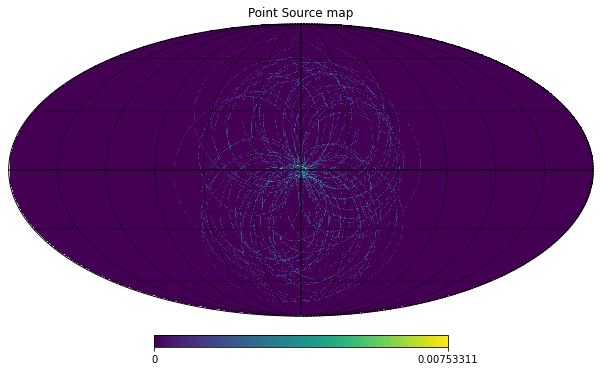

In [21]:
mSrc50 = comsky.utils.MakePointSource(50, NSIDE, 0, 0)
hp.mollview(mSrc50, title="Point Source map")
hp.graticule()

/Users/echarles/miniconda3/envs/mev-sandbox/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/Users/echarles/miniconda3/envs/mev-sandbox/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/Users/echarles/miniconda3/envs/mev-sandbox/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


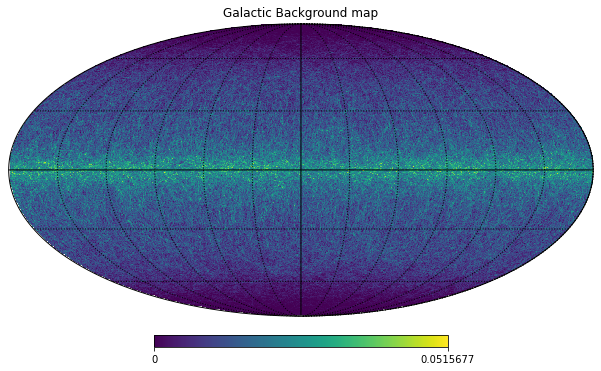

In [3]:
nGal = 10000
mGal = comsky.utils.MakeGalacticBackground(nGal, NSIDE)
hp.mollview(mGal, title="Galactic Background map")
hp.graticule()

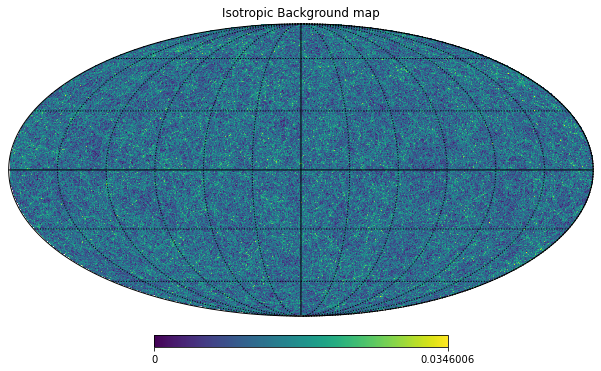

In [4]:
nIso = 10000
mIso = comsky.utils.MakeIsotropicBackground(nIso, NSIDE)
hp.mollview(mIso, title="Isotropic Background map")
hp.graticule()

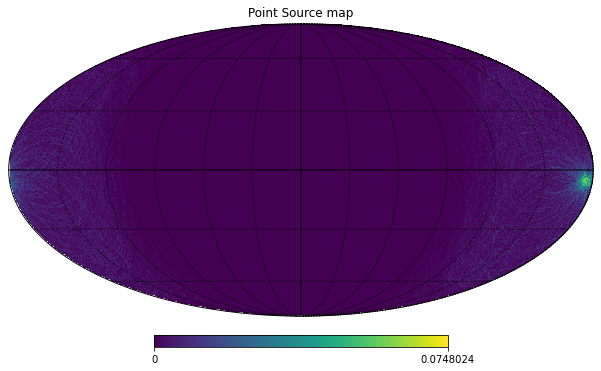

In [19]:
nSrc = 1000
l = 184.55746
b = -5.78436
mSrc = comsky.utils.MakePointSource(nSrc, NSIDE, l, b)
hp.mollview(mSrc, title="Point Source map")
hp.graticule()

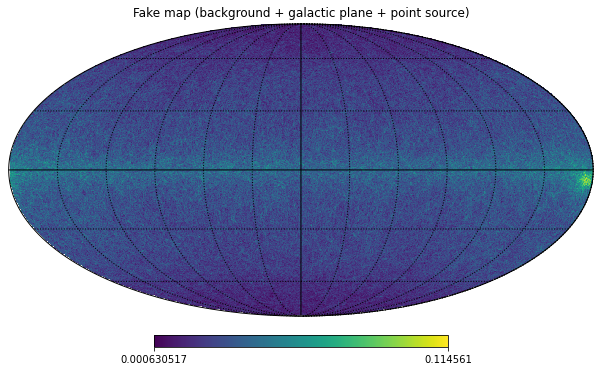

In [20]:
hp.mollview(mSrc+mIso+mGal, title="Fake map (background + galactic plane + point source)")
hp.graticule()

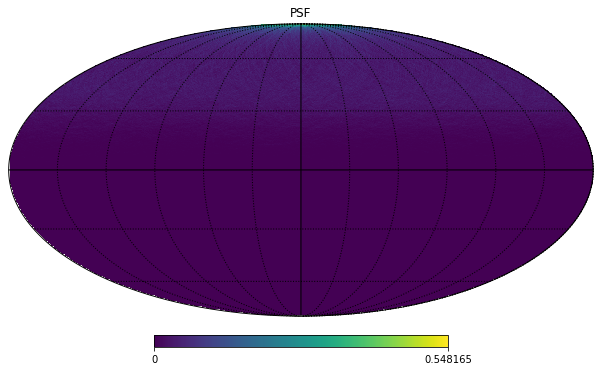

In [7]:
mPSF = comsky.utils.MakePointSource(10000, NSIDE, 0, 90.)
hp.mollview(mPSF, title="PSF")
hp.graticule()

In [8]:
almPSF = hp.sphtfunc.map2alm(mPSF)

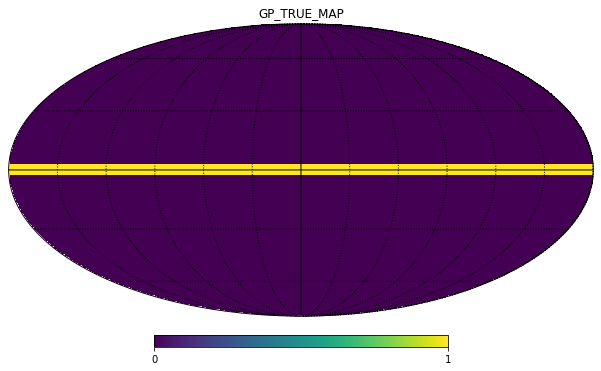

In [9]:
l = 0.
b = 90.
radius=90
width=5
rO=np.deg2rad(radius+0.5*width)
rI=np.deg2rad(radius-0.5*width)
center = hp.pixelfunc.ang2vec(l, b, lonlat=True)
gp_ring = list( set(hp.query_disc(NSIDE, center, rO)) - set(hp.query_disc(NSIDE, center, rI)) )
mGP_True = np.zeros(NPIX)
mGP_True[gp_ring] = 1
hp.mollview(mGP_True, fig=1, title="GP_TRUE_MAP")
hp.graticule()

/Users/echarles/miniconda3/envs/mev-sandbox/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/Users/echarles/miniconda3/envs/mev-sandbox/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


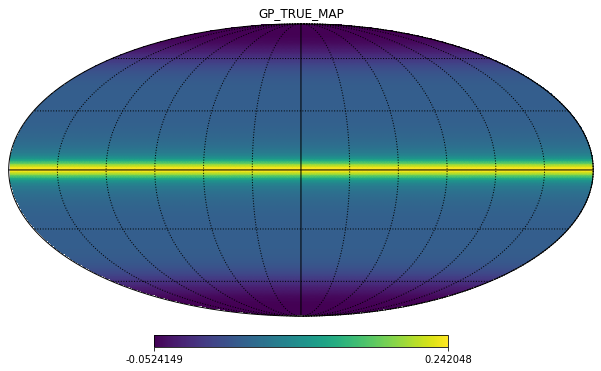

In [10]:
mGP_Conv = comsky.utils.ConvolveUsingAlm(mGP_True, almPSF)
hp.mollview(mGP_Conv, fig=1, title="GP_TRUE_MAP")
hp.graticule()

In [11]:
thetas = np.degrees(hp.pixelfunc.pix2ang(NSIDE, np.arange(NPIX))[0])

In [12]:
bins = np.linspace(0., 90., 451)
hist = np.histogram(thetas, bins=bins, weights=mPSF)[0]
sa_hist = np.histogram(thetas, bins=bins)
hist /= sa_hist[0]

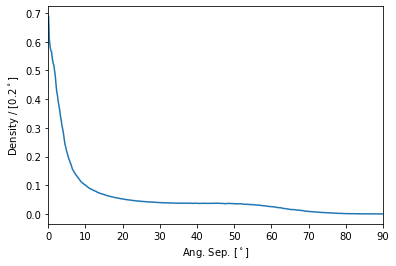

In [13]:
fig = plt.figure()
axs = fig.subplots()
axs.set_xlim(0., 90)
axs.set_xlabel(r"Ang. Sep. [$^\circ$]")
axs.set_ylabel(r"Density / [$0.2^\circ$]")
bin_cent = 0.5*(bins[1:] + bins[0:-1])
axs.plot(bin_cent, hist)

/Users/echarles/miniconda3/envs/mev-sandbox/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/Users/echarles/miniconda3/envs/mev-sandbox/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/Users/echarles/miniconda3/envs/mev-sandbox/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


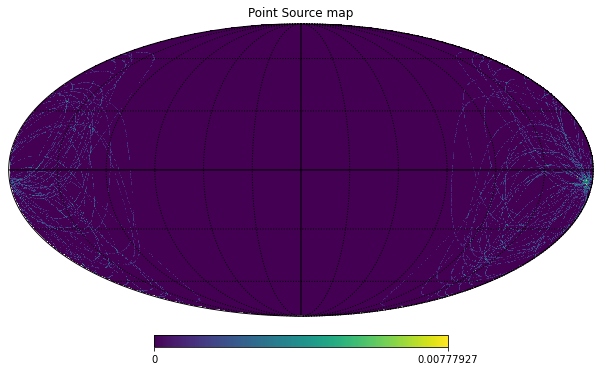

In [14]:
import scipy.stats as sps
NSRC=50
l = 184.55746
b = -5.78436
mSrc = comsky.utils.MakePointSource(50, NSIDE, l, b)
hp.mollview(mSrc, title="Point Source map")
hp.graticule()